#Installing libraries

In [1]:
!pip install transformers[torch]

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [2]:
# Transformers installation
! pip install datasets evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found 

#mounting google drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os

dataset_path = '/content/drive/MyDrive/NLP/'
### check the list files in the folder
print(os.listdir(dataset_path))

['README.md', 'validation.jsonl', 'train.jsonl', 'LSTM_classifier.h5', 'logreg_model.pkl', 'svm_model.pkl', 'rf_model.pkl', 'NLP_CW1.ipynb']


#Loading the dataset

In [5]:
import pandas as pd
import json

id2label = {0: "phrase", 1: "passage",2:"multi"}

label2id = {"phrase": 0, "passage": 1,"multi":2}

In [6]:
def load_data_from_file(file_name):
    data_list = []

    with open(dataset_path + file_name) as file:
        for line in file:
            data = json.loads(line)

            # Extract data from JSON
            tweet = data['postText'][0]
            article_title = data['targetTitle']
            article = ' '.join(data['targetParagraphs'])
            label = data['tags'][0]

            # Ensure label is one of the specified categories
            valid_labels = ['phrase', 'phrases', 'passage', 'multi']

            if label not in valid_labels:
                print("Invalid label:", label)
                continue

            # Skip 'multi' labeled entries
            #if label == 'multi':
            #    continue

            # Combine text and labels
            text = tweet + ' - ' + article_title + article
            #is_clickbait = label in ['phrase', 'phrases','multi']

            data_list.append({'text': text,'category':label})

    return pd.DataFrame(data_list)

#Feature Engineering and pre-processing

In [7]:
# Load the train datasets
train_data = load_data_from_file('train.jsonl')

In [8]:
train_data.head(3)

,text,category
0,"Wes Welker Wanted Dinner With Tom Brady, But P...",passage
1,NASA sets date for full recovery of ozone hole...,phrase
2,This is what makes employees happy -- and it's...,phrase


In [9]:
train_data['category'].value_counts()

,count
category,
phrase,1367
passage,1274
multi,559


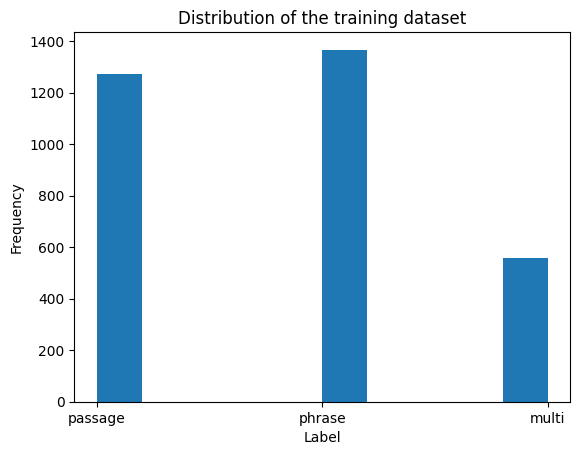

In [10]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
labels = train_data['category']
plt.hist(labels)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Distribution of the training dataset')
plt.show()

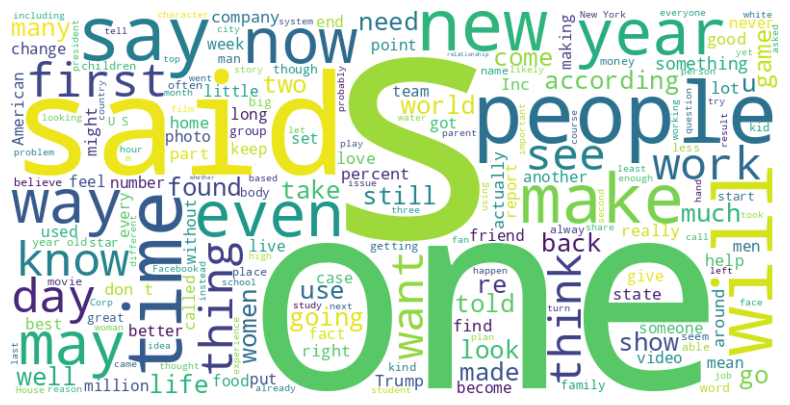

In [11]:
from wordcloud import WordCloud

# Assuming your DataFrame is named 'df'
text_data = train_data['text']

# Combine all text data into a single string
text_train = ' '.join(text_data)

# Create a WordCloud object with custom settings
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_train)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
# Load the valid datasets

validation_data = load_data_from_file('validation.jsonl')
validation_data.head(3)

,text,category
0,Five Nights at Freddy’s Sequel Delayed for Wei...,passage
1,Why Arizona Sheriff Joe Arpaio’s fate could ha...,multi
2,Here’s how much you should be tipping your hai...,phrase


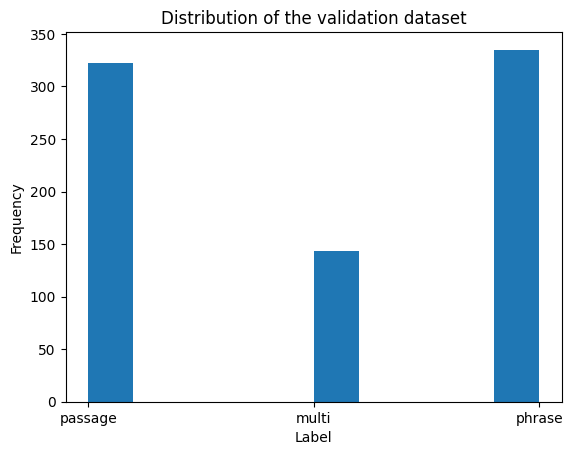

In [13]:
# Assuming your DataFrame is named 'df'
labels = validation_data['category']
plt.hist(labels)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Distribution of the validation dataset')
plt.show()

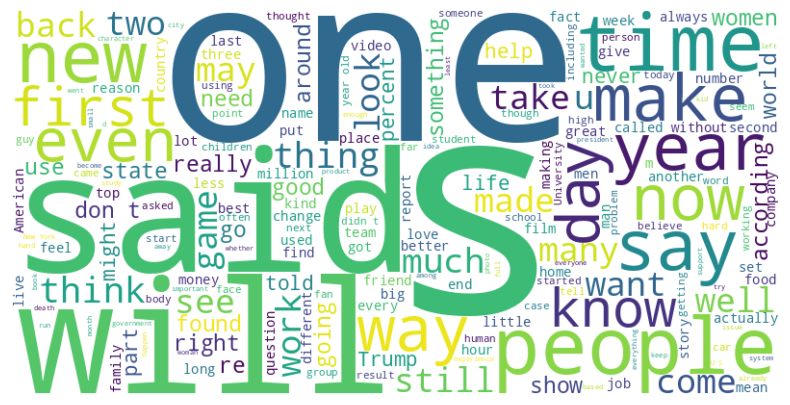

In [14]:
# Assuming your DataFrame is named 'df'
text_data = validation_data['text']

# Combine all text data into a single string
text_valid = ' '.join(text_data)

# Create a WordCloud object with custom settings
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_valid)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
import nltk
import string
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
import string
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
# Import NLTK and download the stopwords dataset if not already downloaded

In [17]:
# Function to clean and preprocess text
class Cleaner():
  def __init__(self):
    pass
  def put_line_breaks(self,text):
    text = text.replace('','\n')
    return text
  def remove_html_tags(self,text):
    cleantext = BeautifulSoup(text, "lxml").text
    return cleantext
  def clean(self,text):
    text = self.put_line_breaks(text)
    text = self.remove_html_tags(text)
    return text

In [18]:
cleaner = Cleaner()
validation_data['text_cleaned'] = validation_data['text'].apply(cleaner.clean)
validation_data.head(3)

,text,category,text_cleaned
0,Five Nights at Freddy’s Sequel Delayed for Wei...,passage,F\ni\nv\ne\n \nN\ni\ng\nh\nt\ns\n \na\nt\n \nF...
1,Why Arizona Sheriff Joe Arpaio’s fate could ha...,multi,W\nh\ny\n \nA\nr\ni\nz\no\nn\na\n \nS\nh\ne\nr...
2,Here’s how much you should be tipping your hai...,phrase,H\ne\nr\ne\n’\ns\n \nh\no\nw\n \nm\nu\nc\nh\n ...


In [19]:
train_data['text_cleaned'] = train_data['text'].apply(cleaner.clean)
train_data.head(3)

,text,category,text_cleaned
0,"Wes Welker Wanted Dinner With Tom Brady, But P...",passage,W\ne\ns\n \nW\ne\nl\nk\ne\nr\n \nW\na\nn\nt\ne...
1,NASA sets date for full recovery of ozone hole...,phrase,N\nA\nS\nA\n \ns\ne\nt\ns\n \nd\na\nt\ne\n \nf...
2,This is what makes employees happy -- and it's...,phrase,T\nh\ni\ns\n \ni\ns\n \nw\nh\na\nt\n \nm\na\nk...


In [20]:
from sklearn import preprocessing


le = preprocessing.LabelEncoder()
le.fit(train_data['category'].tolist())
train_data['label'] = le.transform(train_data['category'].tolist())


le = preprocessing.LabelEncoder()
le.fit(validation_data['category'].tolist())
validation_data['label'] = le.transform(validation_data['category'].tolist())


train_data.head(3)

,text,category,text_cleaned,label
0,"Wes Welker Wanted Dinner With Tom Brady, But P...",passage,W\ne\ns\n \nW\ne\nl\nk\ne\nr\n \nW\na\nn\nt\ne...,1
1,NASA sets date for full recovery of ozone hole...,phrase,N\nA\nS\nA\n \ns\ne\nt\ns\n \nd\na\nt\ne\n \nf...,2
2,This is what makes employees happy -- and it's...,phrase,T\nh\ni\ns\n \ni\ns\n \nw\nh\na\nt\n \nm\na\nk...,2


In [21]:
validation_data.head(3)

,text,category,text_cleaned,label
0,Five Nights at Freddy’s Sequel Delayed for Wei...,passage,F\ni\nv\ne\n \nN\ni\ng\nh\nt\ns\n \na\nt\n \nF...,1
1,Why Arizona Sheriff Joe Arpaio’s fate could ha...,multi,W\nh\ny\n \nA\nr\ni\nz\no\nn\na\n \nS\nh\ne\nr...,0
2,Here’s how much you should be tipping your hai...,phrase,H\ne\nr\ne\n’\ns\n \nh\no\nw\n \nm\nu\nc\nh\n ...,2


#Tokenizer

In [22]:
from transformers import AutoTokenizer
from datasets import Dataset

model_name = "roberta-base" #"bert-large-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True,padding=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [23]:
train_dataset = Dataset.from_pandas(train_data)
test_dataset = Dataset.from_pandas(validation_data)

In [24]:
tokenized_train = train_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

In [25]:
tokenized_test = test_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

#Model Initialization

In [26]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [27]:
from transformers import DataCollatorWithPadding
from transformers import TrainingArguments, Trainer
import evaluate
import numpy as np

In [28]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [29]:
metric = evaluate.load("accuracy")

In [30]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [31]:
#!pip install accelerate -U

#Training

In [1]:
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/NLP/NLP_Task1",
    learning_rate=2e-4,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=5,
    weight_decay=0.01,
    evaluation_strategy = "epoch",
    logging_strategy="epoch"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics

)

trainer.train()

NameError: name 'TrainingArguments' is not defined

In [ ]:
model_name1 = "bert-large-cased"
tokenizer1 = AutoTokenizer.from_pretrained(model_name1)

def preprocess_function1(examples):
    return tokenizer1(examples["text"], truncation=True,padding=True)

In [ ]:
tokenized_train1 = train_dataset.map(preprocess_function1, batched=True)

tokenized_test1 = test_dataset.map(preprocess_function1, batched=True)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained(model_name1, num_labels=3)

In [ ]:
data_collator1 = DataCollatorWithPadding(tokenizer=tokenizer1)

In [ ]:
model_name_save = model_name1.split("/")[-1]

training_args = TrainingArguments(
    output_dir=f"/content/drive/MyDrive/NLP/{model_name_save}",
    learning_rate=2e-4,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=5,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    logging_strategy="epoch"
)

trainer1 = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train1,
    eval_dataset=tokenized_test1,
    tokenizer=tokenizer1,
    data_collator=data_collator1,
    compute_metrics=compute_metrics

)


trainer1.train()

In [ ]:
model_name2 = "microsoft/deberta-base"
tokenizer2 = AutoTokenizer.from_pretrained(model_name2)

def preprocess_function2(examples):
    return tokenizer2(examples["text"], truncation=True,padding=True)

In [ ]:
tokenized_train2 = train_dataset.map(preprocess_function2, batched=True)

tokenized_test2 = test_dataset.map(preprocess_function2, batched=True)

In [ ]:
model2 = AutoModelForSequenceClassification.from_pretrained(model_name2, num_labels=3)

In [ ]:
data_collator2 = DataCollatorWithPadding(tokenizer=tokenizer2)

In [ ]:
model_name_save = model_name2.split("/")[-1]

training_args2 = TrainingArguments(
    output_dir=f"/content/drive/MyDrive/NLP/{model_name_save}",
    learning_rate=2e-4,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=5,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    logging_strategy="epoch"
)

trainer2 = Trainer(
    model=model2,
    args=training_args2,
    train_dataset=tokenized_train2,
    eval_dataset=tokenized_test2,
    tokenizer=tokenizer2,
    data_collator=data_collator2,
    compute_metrics=compute_metrics

)


trainer2.train()

In [ ]:
trainer.save_model('"/content/drive/MyDrive/NLP/')

#Model Evaluation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
preds = trainer.predict(tokenized_test)
preds = np.argmax(preds[:3][0],axis=1) #preds[:3][1]
GT = validation_data['label'].tolist()
print(classification_report(GT,preds))

In [ ]:
preds = trainer1.predict(tokenized_test1)
preds = np.argmax(preds[:3][0],axis=1) #preds[:3][1]
GT = validation_data['label'].tolist()
print(classification_report(GT,preds))

In [ ]:
preds = trainer2.predict(tokenized_test2)
preds = np.argmax(preds[:3][0],axis=1) #preds[:3][1]
GT = validation_data['label'].tolist()
print(classification_report(GT,preds))

In [ ]:
from google.colab import runtime
runtime.unassign()